In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from keras.regularizers import l2
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D,  MaxPooling2D, ZeroPadding2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from keras.layers.normalization import BatchNormalization

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from utils.plot_history import plot_history
import numpy as np

In [2]:
def compile_model(input_shape, alpha): #CRIE SEU PRÓPRIO MODELO AQUI
  model = models.Sequential()

  model.add(Input(shape=input_shape))

  model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))

  model.add(Flatten())

  model.add(Dense(128))
  model.add(Activation('relu'))

  model.add(Dropout(0.5))

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  opt = SGD(learning_rate=alpha)
  model.summary()
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['acc'])
      
  print("Modelo Compilado...")
  return model

def data_augment(batch_size, input_shape): #Gerando novas imagens com rotações e zooms para incrementar o treino.
  image_gen = ImageDataGenerator(rotation_range= 360, rescale = 1/255, horizontal_flip= True, vertical_flip=True)

  train_images = image_gen.flow_from_directory('DATASET_2/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')
  test_images = image_gen.flow_from_directory('DATASET_2/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

  return train_images, test_images

def create_callbacks(alpha): #Callbacks para serem aplicados no treino
  filepath="model_one.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
  # lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=alpha, patience=5, verbose=1)

  callbacks = [checkpoint]
  return callbacks
  
def train_Model(): #Funcão para treinar o modelo
  batch_size   = 16
  alpha        = 1e-3
  epoch        = 100
  input_shape  = (128,128, 3)

  model = compile_model(input_shape, alpha)
  print("Criando Array de callbacks")
  callbacks = create_callbacks(alpha)
  print("Criando data augmentator")
  train_images, test_images = data_augment(batch_size, input_shape)
  
  print("Iniciando treino do Modelo...")
  history = model.fit(
                              train_images,
                              validation_data=test_images,
                              callbacks=callbacks,
                              epochs=epoch)

  return history, model


In [3]:
history, model = train_Model()

____
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 30,502,081
Trainable params: 30,502,081
Non-trainable params: 0
_________________________________________________________________
Modelo Compilado...
Criando Array de callbacks
Criando data augmentator
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Iniciando treino do Modelo...
Epoch 1/100
125/125 [==============================] - 53s 420ms/step - loss: 0.6614 - acc: 0.6116 - val_loss: 0.5910 - val_acc: 0.7070

Epoch 00001: val_acc improved from -inf to 0.70700, saving model t

KeyboardInterrupt: 

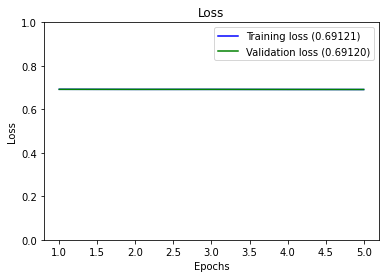

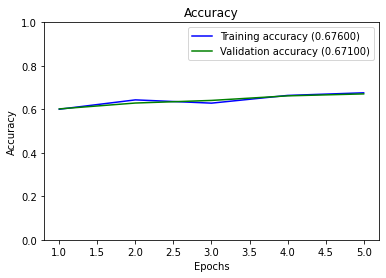

In [17]:
plot_history(history)

In [19]:
from accuracy import test_accuracy
test_accuracy(target_size=(150,150,3))

Acurácia:
71.6
